# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Background

The used car market is large and competitive, with prices influenced by factors such as brand, mileage, year, condition, and fuel type. Customers often seek affordable and reliable vehicles, which puts pressure on dealerships to price cars competitively while maintaining profitability.

Understanding what drives the price of a used car is challenging due to the complex interplay of these variables. A data-driven approach can help uncover these patterns and support better business decisions.


#### Business Objective

The objective of this project is to help a used car dealership understand which factors most influence the price of a used car.

Using features such as **year**, **manufacturer**, **model**, **condition**, **cylinders**, **fuel**, **odometer**, **transmission**, **drive**, **size**, **type**, and **paint_color**, we aim to:

- Identify the key attributes that affect pricing.
- Provide insights to improve pricing, inventory selection, and marketing.
- Enable data-driven decisions to increase profitability and customer satisfaction.




#### Inventory of Resources:

The provided dataset information on 426K cars

#### Data Mining Goal

Build a predictive model to estimate the **price** of a used car based on features such as **year**, **manufacturer**, **model**, **condition**, **cylinders**, **fuel**, **odometer**, **transmission**, **drive**, **size**, **type**, **paint_color**, and **state**.

The goal is to:

- Predict car prices accurately.
- Identify the most influential features affecting price.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
#!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
import category_encoders as ce
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

#### Load the Dataset

In [3]:
df_og = pd.read_csv('data/vehicles.csv')
df = df_og.copy()
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10251,7316750634,phoenix,23995,2017.0,gmc,acadia,NaN,4 cylinders,gas,46557.0,clean,automatic,NaN,fwd,mid-size,SUV,custom,az
156151,7307723007,cedar rapids,24988,2017.0,lincoln,mkz reserve,NaN,4 cylinders,gas,40483.0,clean,automatic,3LN6L5F91HR663444,4wd,NaN,sedan,silver,ia
3187,7310478806,huntsville / decatur,24990,2014.0,acura,mdx sh-awd sport utility,good,6 cylinders,gas,52396.0,clean,automatic,5FRYD4H81EB042046,NaN,NaN,SUV,silver,al
43352,7313979902,orange county,0,2011.0,lexus,is,NaN,NaN,gas,134166.0,clean,automatic,JTHBF5C23B5131624,rwd,full-size,sedan,NaN,ca
72790,7315347719,colorado springs,20988,2019.0,subaru,impreza,NaN,NaN,other,18752.0,clean,other,4S3GTAC62K3729338,NaN,NaN,NaN,NaN,co


#### Describe Data

In [4]:
df.describe(include='object')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Finding Missing Values

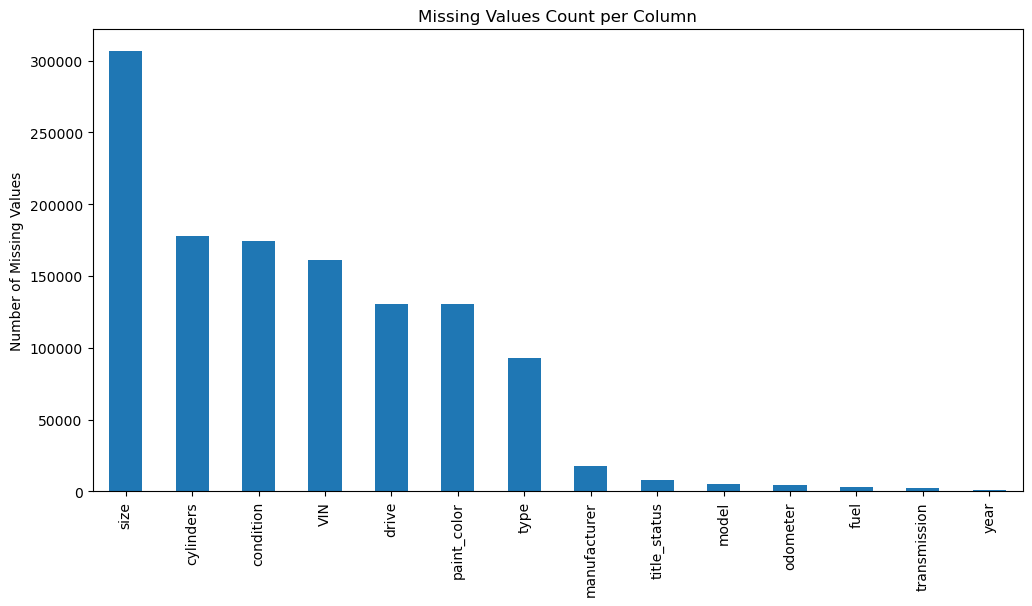

In [6]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
missing_counts.plot(kind='bar')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Count per Column')
plt.show()

In [7]:
# Check for duplicates
df.duplicated().sum()

0

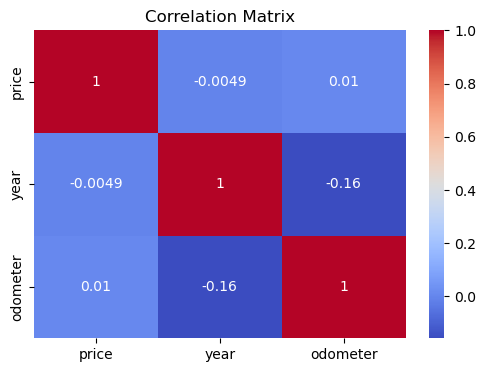

In [8]:
numeric_cols = ['price', 'year', 'odometer']
corr_matrix = df[numeric_cols].corr()

# Heatmap for visualization
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Price and odometer 

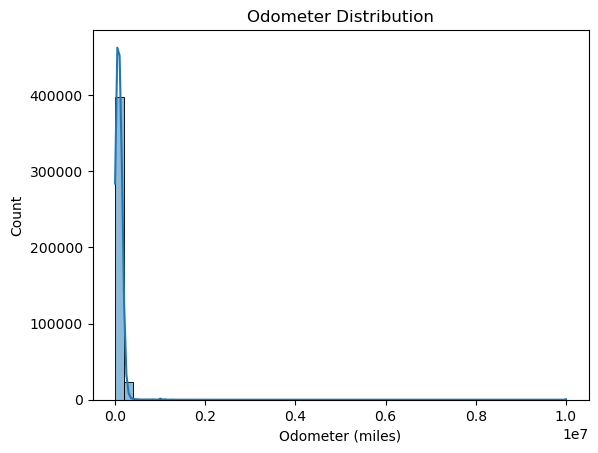

In [9]:
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Odometer Distribution')
plt.xlabel('Odometer (miles)')
plt.show()



#### Price correlation not showing up correctly due to 
- Outliers in the price column (e.g., prices like $0, $1, or extremely high values)
- Data quality issues — missing or incorrect year, odometer, or price values
- Non-linear relationships — e.g., price might drop sharply after a certain mileage, not linearly
- Other features (like condition, fuel, type) may be more predictive of price

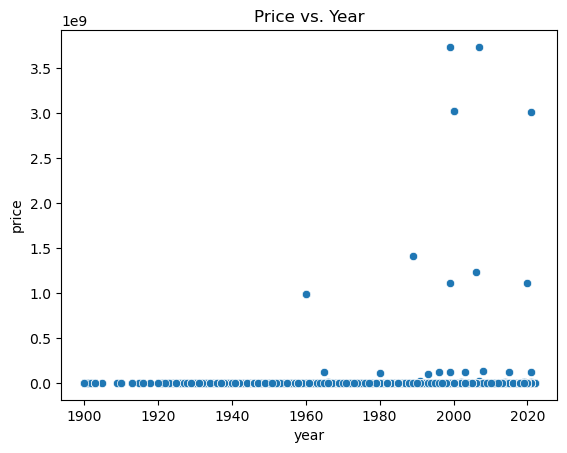

In [10]:
sns.scatterplot(x='year', y='price', data=df)
plt.title('Price vs. Year')
plt.show()

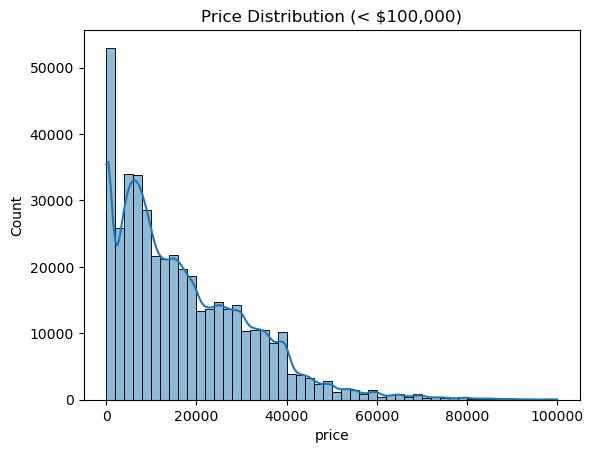

Number of price points with < 100 cars: 15072
Number of cars with rare prices: 90840


In [11]:

# Zoom into price under a reasonable limit (e.g., under $100,000)
sns.histplot(df[df['price'] < 100000]['price'], bins=50, kde=True)
plt.title('Price Distribution (< $100,000)')
plt.show()

price_counts = df['price'].value_counts()
rare_prices = price_counts[price_counts < 100]
print(f"Number of price points with < 100 cars: {len(rare_prices)}")
num_cars_with_rare_prices = df[df['price'].isin(rare_prices.index)].shape[0]
print(f"Number of cars with rare prices: {num_cars_with_rare_prices}")

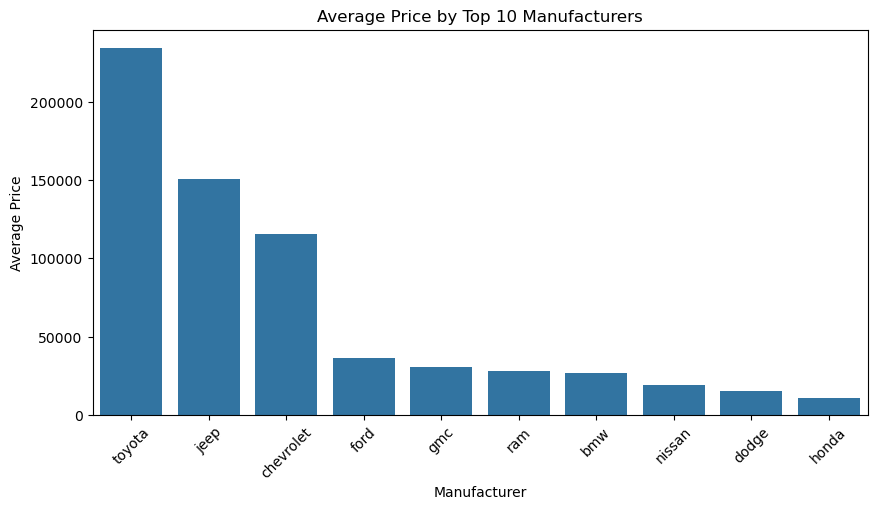

In [12]:
# Calculate average price for top manufacturers
top_makes = df['manufacturer'].value_counts().nlargest(10).index
avg_price_by_make = df[df['manufacturer'].isin(top_makes)].groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values)
plt.title('Average Price by Top 10 Manufacturers')
plt.ylabel('Average Price')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.show()
#top used cars manufacturers are Toyota, Jeep and Chevrolet

C:\Users\archa\AppData\Local\Temp\ipykernel_22992\2805488576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel', palette='Set2')


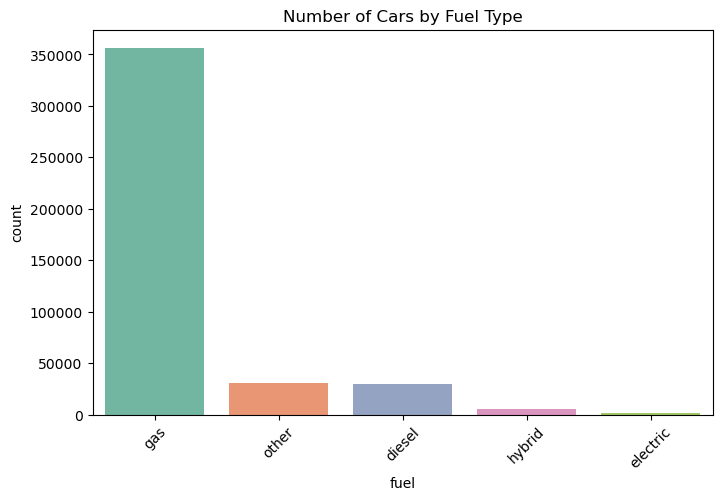

In [13]:
### Check the number of cars by fuel type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='fuel', palette='Set2')
plt.title('Number of Cars by Fuel Type')
plt.xticks(rotation=45)
plt.show()
# Most of the cars are gas fuel type

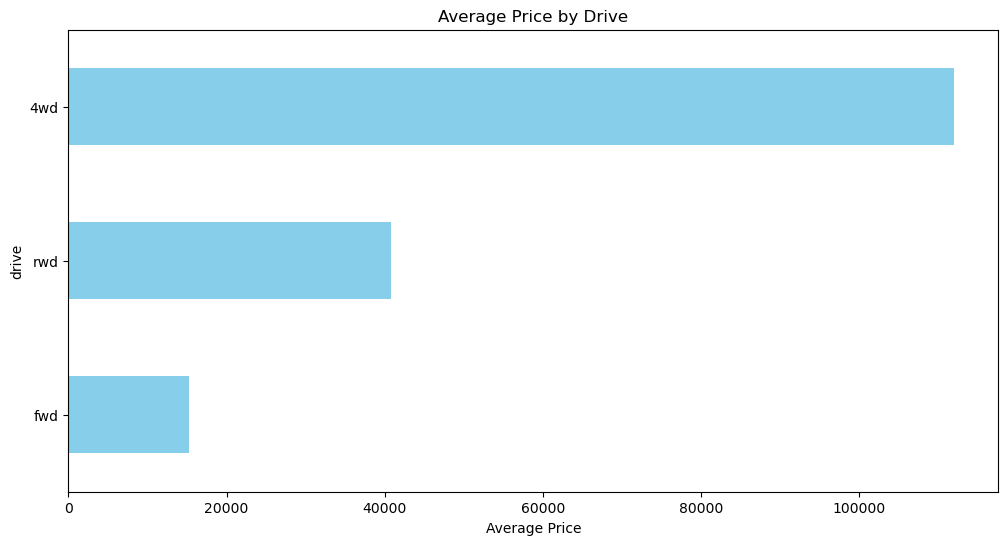

In [14]:
plt.figure(figsize=(12, 6))
df.groupby('drive')['price'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Price by Drive')
plt.xlabel('Average Price')
plt.show()


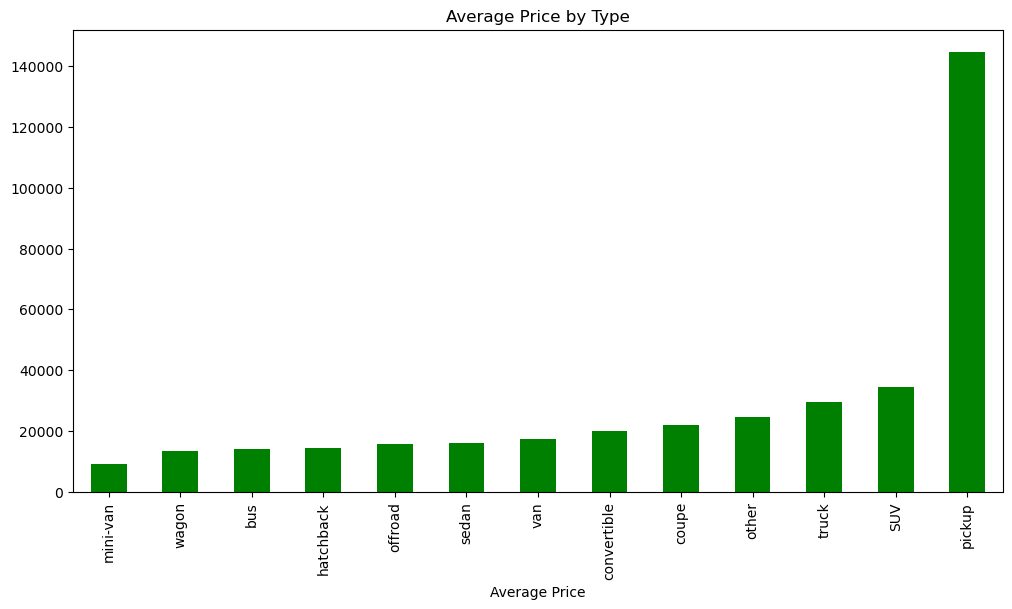

In [15]:
plt.figure(figsize=(12, 6))
df.groupby('type')['price'].mean().sort_values().plot(kind='bar', color='green')
plt.title('Average Price by Type')
plt.xlabel('Average Price')
plt.show()

Text(0.5, 1.0, 'Price vs Condition Plot')

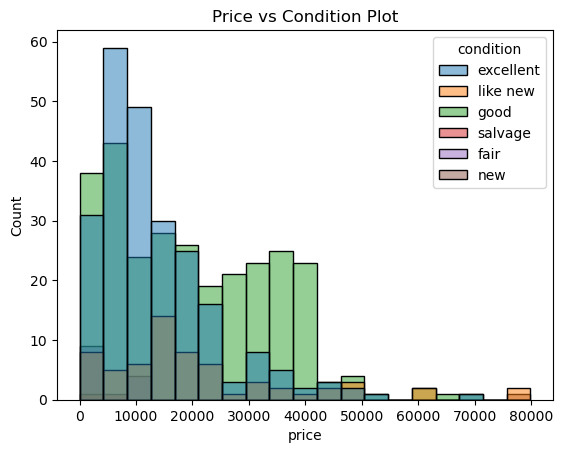

In [16]:
# Histplot for price vs condition
sample_df = df.sample(1000) 
sns.histplot(data =sample_df, x='price', hue='condition')
plt.title('Price vs Condition Plot')

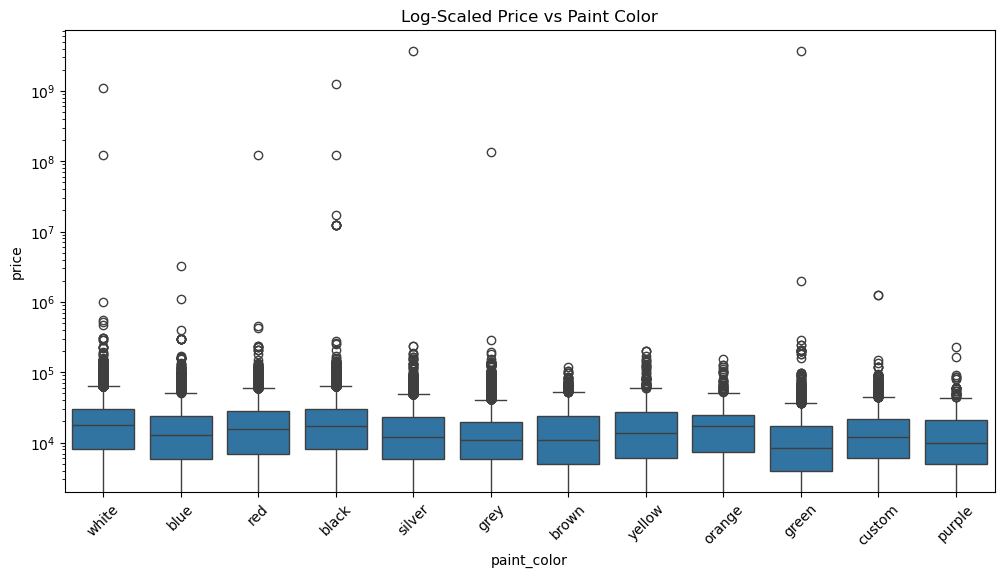

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='paint_color', y='price')
plt.yscale('log')
plt.title('Log-Scaled Price vs Paint Color')
plt.xticks(rotation=45)
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Initial filtering and cleanup

In [18]:
# Remove rows with price == 0 (invalid target values)
print(f"Original dataset size: {df.shape}")
df = df[df['price'] > 0]
print(f"Dataset size after removing price=0 rows: {df.shape}")

# Remove extreme prices (adjust thresholds as needed)
df = df[(df['price'] >= 100) & (df['price'] <= 150000)]
print(f"Dataset size after removing extreme prices: {df.shape}")

Original dataset size: (426880, 18)
Dataset size after removing price=0 rows: (393985, 18)
Dataset size after removing extreme prices: (390462, 18)


In [19]:
missing_percent = df.isna().mean().round(4)*100 # percentage of missing values 
missing_percent

id               0.00
region           0.00
price            0.00
year             0.30
manufacturer     4.04
model            1.17
condition       38.29
cylinders       40.60
fuel             0.66
odometer         0.58
title_status     1.98
transmission     0.47
VIN             38.55
drive           30.46
size            72.07
type            21.58
paint_color     29.62
state            0.00
dtype: float64

In [20]:
# Drop column size as > 70% missing, VIN and region can also be dropped as its not useful for price prediction, although keeping state
# Drop columns condition and cylinders as more than 40% data is missing, and imputations might skew the results
cols_to_drop = ['id', 'region', 'condition', 'cylinders', 'VIN', 'size']
df.drop(columns=cols_to_drop, inplace=True)

#### Handle missing values

In [21]:
num_cols = ['year', 'odometer']
cat_cols = ['manufacturer', 'model', 'fuel', 'title_status', 
            'transmission', 'drive', 'type', 'paint_color', 'state']

# Numerical imputation (median)
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical imputation
for col in cat_cols:
    if df[col].isnull().mean() > 0.3:
        df[col] = df[col].fillna('unknown')
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

#### Feature Engineering

In [22]:
current_year = 2025  # Current year
df['age'] = current_year - df['year']
df.drop('year', axis=1, inplace=True)

In [23]:
#### Outliers Handling

In [24]:
numerical_features = ['price', 'odometer']

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    
    print(f"Outliers in '{col}' capped. Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Outliers in 'price' capped. Lower bound: -23112.5, Upper bound: 58507.5
Outliers in 'odometer' capped. Lower bound: -106947.5, Upper bound: 280440.5


In [25]:
df.sample(10)

,price,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
2197,36990.0,ford,f150 supercrew cab xlt,other,15443.0,clean,automatic,4wd,pickup,red,al,8.0
211385,9700.0,ford,f150 lariat,gas,168575.0,clean,automatic,4wd,sedan,white,mn,15.0
206547,29590.0,acura,mdx sport utility 4d,other,42224.0,clean,other,unknown,SUV,black,mi,7.0
96694,20000.0,chevrolet,suburban,gas,160000.0,clean,automatic,unknown,sedan,white,fl,10.0
377092,36470.0,jeep,wrangler unlimited,gas,77123.0,clean,automatic,4wd,SUV,green,tx,12.0
61926,10100.0,ford,f-150,gas,106857.0,clean,automatic,4wd,truck,white,ca,15.0
231195,31990.0,ram,promaster cargo 1500 cargo 136 wb,gas,26681.0,clean,automatic,fwd,van,white,nc,5.0
74058,58507.5,chevrolet,silverado 2500 ltz,other,23958.0,clean,automatic,4wd,pickup,white,co,6.0
170244,35988.0,dodge,challenger srt8,gas,40619.0,clean,automatic,unknown,sedan,white,ks,12.0
395529,34590.0,bmw,3 series 330i xdrive sedan,other,7460.0,clean,other,unknown,sedan,black,va,6.0


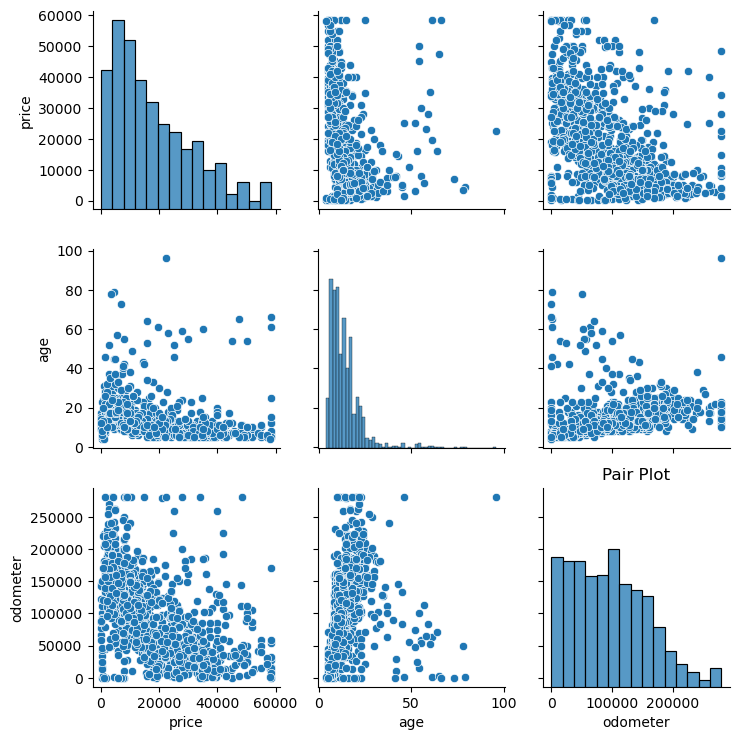

In [26]:
# Dataframe for numeric variables
num_df = df[['price', 'age', 'odometer']]
sns.pairplot(num_df.sample(1000))
plt.title('Pair Plot')
plt.tight_layout()
plt.show()

#### Train_Test_Split

In [27]:
# Preparing test and development datasets by splitting
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Creating Pipelines

In [28]:
df.columns

Index(['price', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state', 'age'],
      dtype='object')

In [29]:
# Define features
numerical_features = ['odometer', 'age']
onehot_features = ['fuel', 'transmission', 'drive', 'type', 'paint_color', 'title_status']
target_features = ['manufacturer', 'model', 'state']

In [30]:
# Preprocessor Definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipe', Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('scaler', StandardScaler())
        ]), numerical_features),

        ('target_enc', ce.TargetEncoder(), target_features),

        ('onehot_enc', OneHotEncoder(handle_unknown='ignore', drop='first'), onehot_features)
    ],
    remainder='drop'
)


### Set Up Model Pipelines and Hyperparameter Grids

### Pipeline for Ridge

In [31]:
# Pipeline for Ridge
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

ridge_param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(
    ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
print("Running GridSearchCV for Ridge...")
ridge_grid.fit(X_train, y_train)

Running GridSearchCV for Ridge...


,estimator,"Pipeline(step...l', Ridge())])"
,param_grid,"{'model__alpha': [0.01, 0.1, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_pipe', ...), ('target_enc', ...), ...]"


### Pipeline for Lasso

In [32]:
# Pipeline for Lasso
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=10000, random_state=42))
])

lasso_param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

lasso_grid = GridSearchCV(
    lasso_pipeline,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
print("\nRunning GridSearchCV for Lasso...")
lasso_grid.fit(X_train, y_train)


Running GridSearchCV for Lasso...


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_pipe', ...), ('target_enc', ...), ...]"


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [33]:
print("\n--- Final Model Evaluation ---")
# Get the best estimators
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_


--- Final Model Evaluation ---


In [34]:
# Make predictions on the unseen test set
ridge_preds = best_ridge.predict(X_test)
lasso_preds = best_lasso.predict(X_test)

In [35]:
# Calculate and print final metrics
ridge_mae = mean_absolute_error(y_test, ridge_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

In [38]:
print(f"Ridge: Best alpha = {ridge_grid.best_params_['model__alpha']}")
print(f"Lasso: Best alpha = {lasso_grid.best_params_['model__alpha']}")
print("\n")
print(f"Ridge Test MAE: ${ridge_mae:,.2f}")
print(f"Ridge Test R-squared: {ridge_r2:.2f}")
print(f"Lasso Test MAE: ${lasso_mae:,.2f}")
print(f"Lasso Test R-squared: {lasso_r2:.2f}")

Ridge: Best alpha = 100
Lasso: Best alpha = 0.1


Ridge Test MAE: $7,163.39
Ridge Test R-squared: 0.48
Lasso Test MAE: $5,152.36
Lasso Test R-squared: 0.69


In [39]:
# Conclusion
if ridge_mae < lasso_mae:
    print("\nBased on MAE, the Ridge model performs better on the test data.")
else:
    print("\nBased on MAE, the Lasso model performs better on the test data.")



Based on MAE, the Lasso model performs better on the test data.


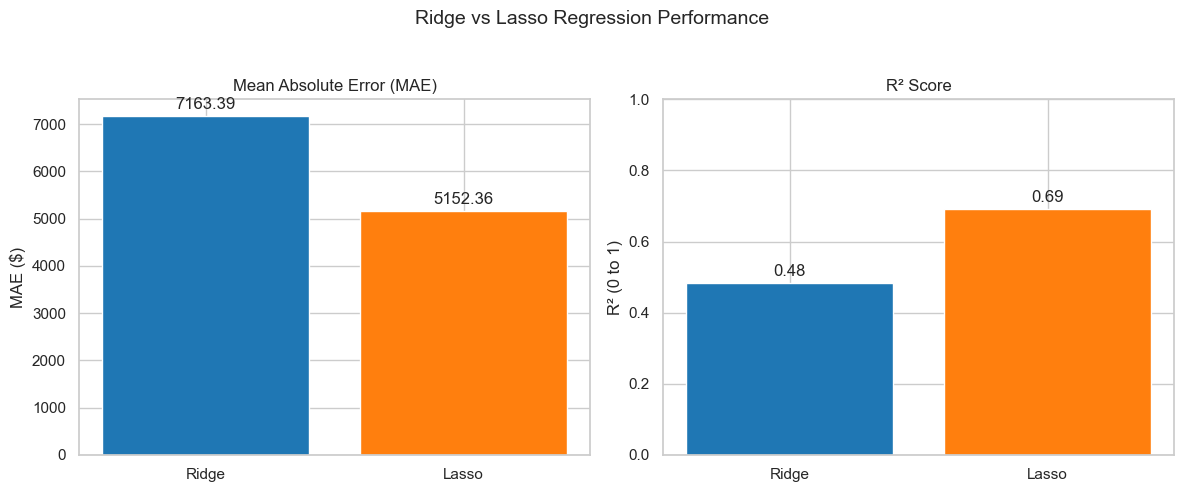

In [50]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style("whitegrid")

# MAE subplot
axs[0].bar(['Ridge', 'Lasso'], [ridge_mae, lasso_mae], color=['#1f77b4', '#ff7f0e'])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE ($)')
axs[0].bar_label(axs[0].containers[0], fmt='%.2f', padding=3)

# R² subplot
axs[1].bar(['Ridge', 'Lasso'], [ridge_r2, lasso_r2], color=['#1f77b4', '#ff7f0e'])
axs[1].set_title('R² Score')
axs[1].set_ylabel('R² (0 to 1)')
axs[1].set_ylim(0, 1)  # Force scale to match R² range
axs[1].bar_label(axs[1].containers[0], fmt='%.2f', padding=3)

# Overall formatting
fig.suptitle('Ridge vs Lasso Regression Performance', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('images/ridge_vs_lasso_split.png', dpi=300)

plt.show()


In [44]:
preprocessor = lasso_grid.best_estimator_.named_steps['preprocessor']
#Get the feature names
feature_names = preprocessor.get_feature_names_out()

# Get the Lasso model from the pipeline
lasso_model = lasso_grid.best_estimator_.named_steps['model']

# Create the Series with the correct number of coefficients and feature names
coefficients = pd.Series(lasso_model.coef_, index=feature_names)

# Display the non-zero coefficients
important_features = coefficients[coefficients != 0].sort_values(ascending=False)
print("Important Features (ranked by coefficient magnitude):\n")
print(important_features)

Important Features (ranked by coefficient magnitude):

num_pipe__age^2                        7080.678782
onehot_enc__type_convertible           3332.791561
onehot_enc__type_coupe                 2292.232403
onehot_enc__type_pickup                2273.489121
onehot_enc__type_other                 2117.235262
onehot_enc__type_mini-van              2016.545813
num_pipe__odometer^2                   1901.701477
onehot_enc__type_van                   1901.632295
onehot_enc__type_truck                 1745.902213
onehot_enc__type_offroad               1532.892863
num_pipe__odometer age                  924.250485
onehot_enc__transmission_manual         565.613960
onehot_enc__type_sedan                  428.164216
onehot_enc__paint_color_purple          288.913619
onehot_enc__title_status_lien           183.960681
onehot_enc__paint_color_custom           38.988653
target_enc__model                         0.684261
target_enc__state                         0.360696
target_enc__manufacturer   

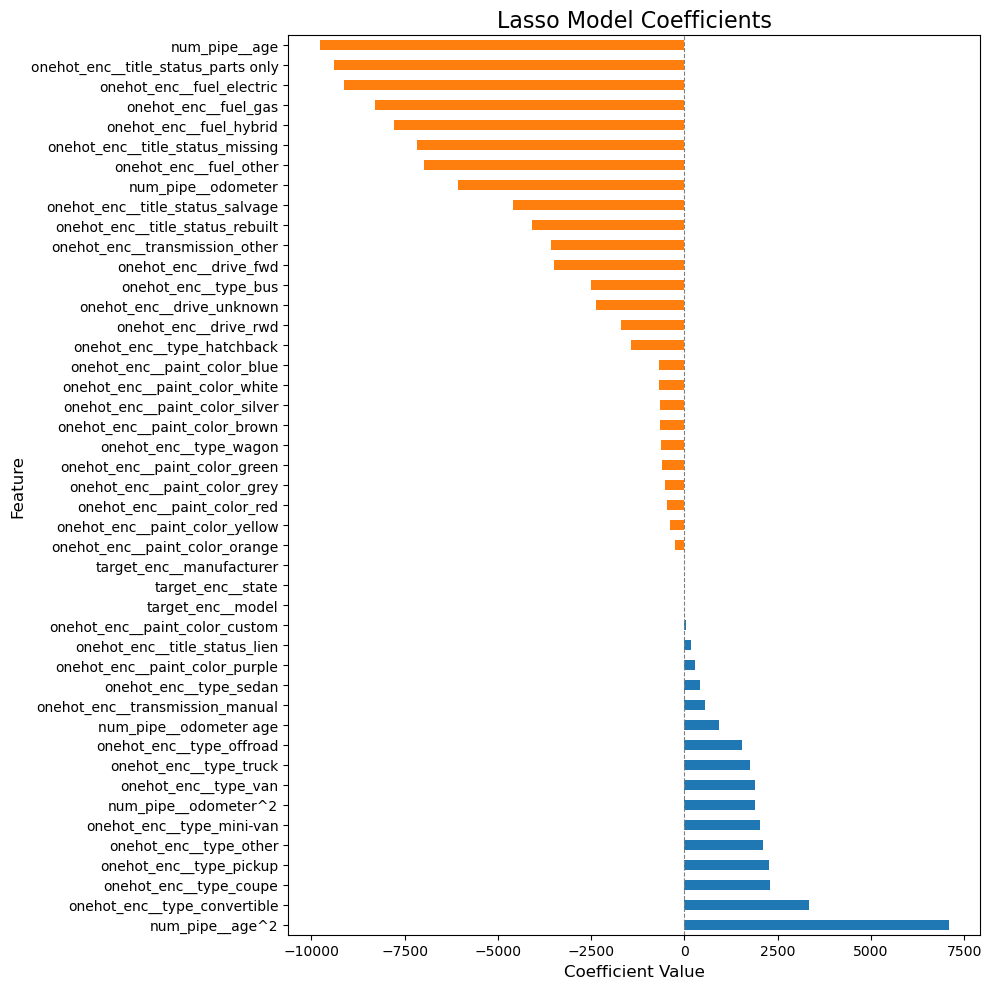

<Figure size 640x480 with 0 Axes>

In [46]:
# Plotting the coefficients
plt.figure(figsize=(10, 10))
important_features.plot(kind='barh', color=['#1f77b4' if x > 0 else '#ff7f0e' for x in important_features])
plt.title('Lasso Model Coefficients', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

plt.savefig('images/vehicles_price_affecting_features.jpg')

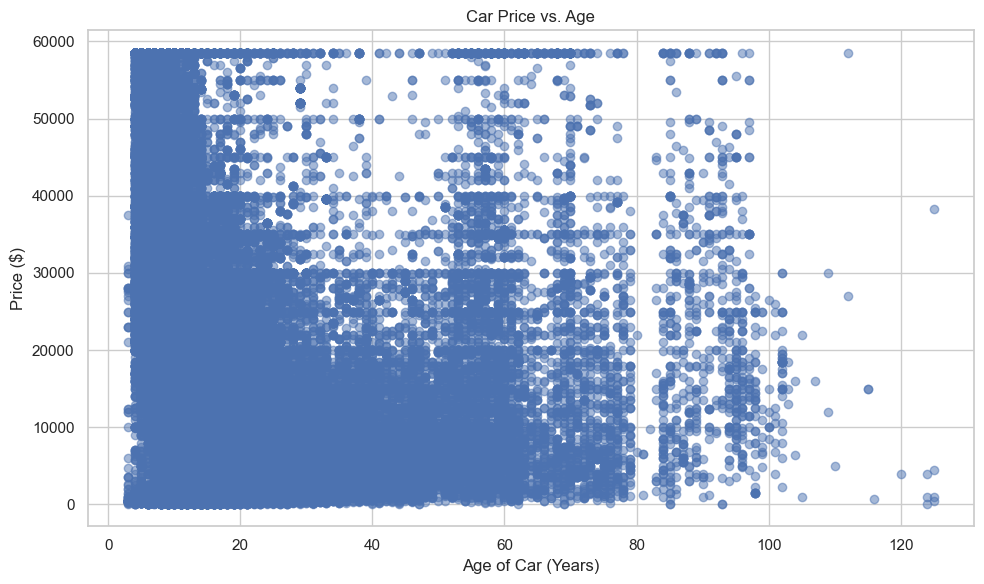

<Figure size 640x480 with 0 Axes>

In [51]:
# Plotting the age

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.5)
plt.title('Car Price vs. Age')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('images/car_price_vs_age.jpg')

## Evaluation

The goal of this project was to identify which factors influence the price of used cars, and to provide actionable insights to a used car dealership based on consumer preferences.

After cleaning and preprocessing a dataset of over 426,000 vehicles, we tested both Ridge and Lasso regression models. Lasso was selected for deployment due to its better predictive performance and interpretability.

- **Lasso Test MAE**: $5,152.36
- **Lasso Test R²**: 0.69

Key findings from the model:

- **Price decreases with age** (−$9,780 per year), but the inclusion of `age²` (+$7,081) shows that depreciation slows down over time.
- **Body styles like convertibles, coupes, and pickups** tend to be more expensive.
- **Mileage (odometer)** negatively impacts value, especially in early ranges.
- **Title status has a major effect** — salvage, rebuilt, or missing titles lower value by $4,000–$9,000.
- **Fuel type matters** — gas, electric, and hybrid vehicles are valued lower in the used market.
- **Unusual paint colors** (e.g., purple, custom) may slightly increase price, while common ones (silver, white, blue) show slight decreases.

These insights align well with real-world trends and provide a data-driven view of what consumers value in used cars.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Deployment Details

Based on these findings, we developed a pricing tool using the Lasso regression model. It estimates the value of a used car based on key features, making it easy for dealerships to price inventory accurately.

#### How to Use This:

Dealers can input vehicle details — such as age, mileage, title status, fuel type, and body style — into the tool to receive a price estimate grounded in real-world sales data.

The tool is designed to:

- **Improve trade-in and acquisition decisions** by identifying under- or overvalued vehicles.
- **Set competitive and consistent prices** across inventory listings.
- **Highlight features consumers value most**, helping prioritize which cars to stock.
- **Support staff training** with a standardized, data-backed pricing approach.

The model should be updated periodically to reflect changes in consumer preferences and market conditions.
